# Pipeline End-to-End untuk Regresi Model Machine Learning

## 1. Persiapan Lingkungan Kerja
Pertama, mari kita impor semua library yang diperlukan:

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

## 2. Pengumpulan & Pembersihan Data
Data diimoport melalui link: https://drive.google.com/file/d/1sJC9oDOTiVApJ3s5jUXBfB8X0RL_Rkyv/view?usp=sharing yang tersimpan dalam folder Drive pribadi. Disimpan dalam variabel `df`.

Karena tidak ada missing values pada dataset, maka tidak perlu dilakukan pembersihan data.

In [2]:
# Connecting to Google Drive
drive.mount('/content/drive')

# Importing Dataset
df = pd.read_csv('/content/drive/MyDrive/Belajar (PTA TA)/Tempat Belajar/RegresiUTSTelkom.csv', header=None)

# Display  dataset
df.info()
df.describe()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


1. dataset memiliki fitur numerik (90 kolom float64 dan 1 kolom int64)
2. Semua kolom terisi penuh tanpa ada nilai yang hilang
3. Kolom pertama (kolom 0) tampaknya berisi tahun 2001 untuk setidaknya 5 baris pertama
4. Kolom yang tersisa (1-90) berisi berbagai nilai floating point

## 3. Feature Selection

### a. Menghilangkan fitur dengan variansi konstan atau quasi-konstan

In [3]:
# Mencari fitur dengan variansi rendah (konstan atau quasi-konstan)
def remove_constant_features(df, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(df)
    constant_features = [column for column, include in zip(df.columns, selector.get_support()) if not include]
    print(f"Fitur konstan atau quasi-konstan: {constant_features}")
    return df.loc[:, selector.get_support()]

# Membagi data menjadi fitur (X) dan target (Y)
# Asumsikan kolom pertama (0) adalah tahun, dan kolom terakhir (90) adalah target
X = df.iloc[:, 1:] # Fitur dari kolom 2 sampai kolom terakhir
y = df.iloc[:, 0]    # Target adalah kolom pertama

print("Jumlah fitur awal:", X.shape[1])
X_var = remove_constant_features(X)
print("Jumlah fitur setelah menghilangkan fitur konstan:", X_var.shape[1])

Jumlah fitur awal: 90
Fitur konstan atau quasi-konstan: []
Jumlah fitur setelah menghilangkan fitur konstan: 90


### b. Menghilangkan fitur yang saling berkorelasi tinggi

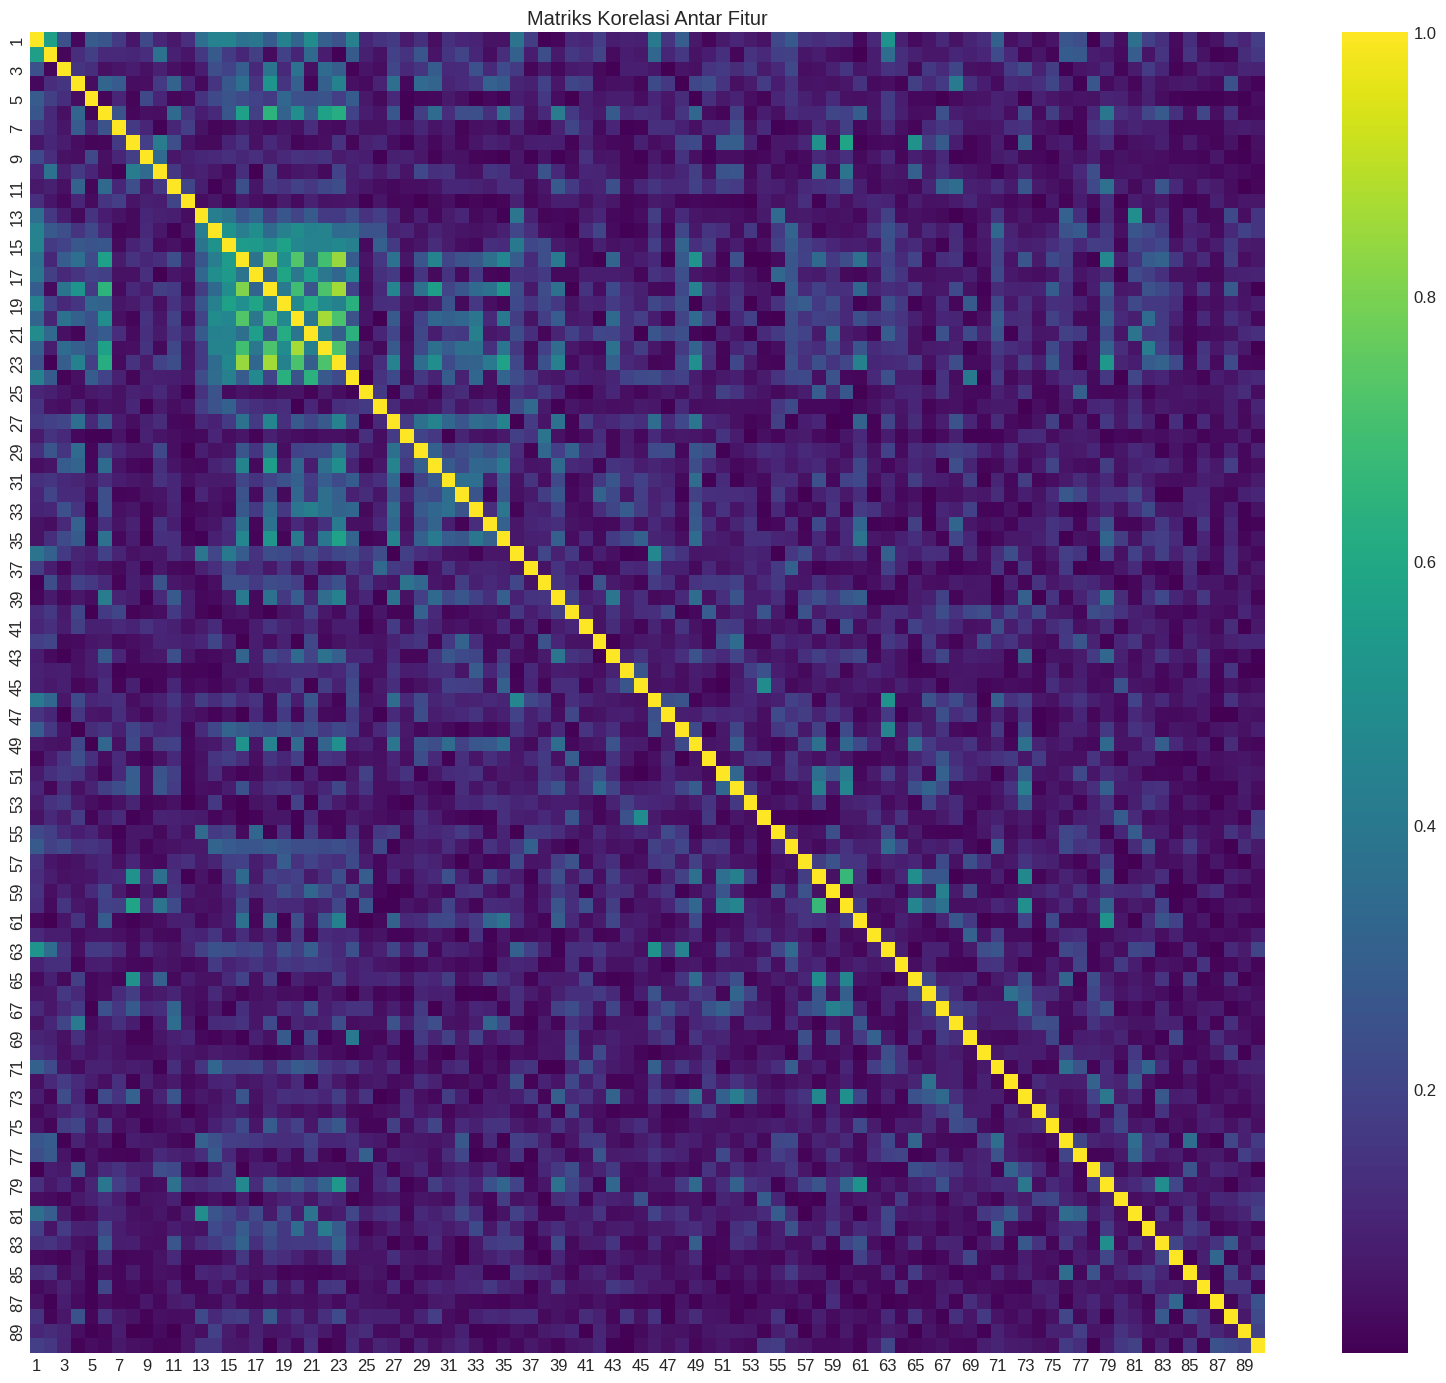

Jumlah fitur yang akan dihapus karena berkorelasi tinggi: 3
Jumlah fitur setelah menghilangkan fitur berkorelasi tinggi: 87


In [4]:
def correlation_selection(X, threshold=0.8):
    # Menghitung matriks korelasi
    corr_matrix = X.corr().abs()

    # Buat plot heatmap korelasi
    plt.figure(figsize=(16, 14))
    sns.heatmap(corr_matrix, cmap='viridis', annot=False)
    plt.title('Matriks Korelasi Antar Fitur')
    plt.tight_layout()
    plt.show()

    # Mendapatkan pasangan fitur dengan korelasi tinggi
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Fitur yang akan dihapus
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"Jumlah fitur yang akan dihapus karena berkorelasi tinggi: {len(to_drop)}")

    # Mengembalikan dataset tanpa fitur berkorelasi tinggi
    return X.drop(to_drop, axis=1)

X_corr = correlation_selection(X_var)
print("Jumlah fitur setelah menghilangkan fitur berkorelasi tinggi:", X_corr.shape[1])

### c. Feature Selection dengan Mutual Information

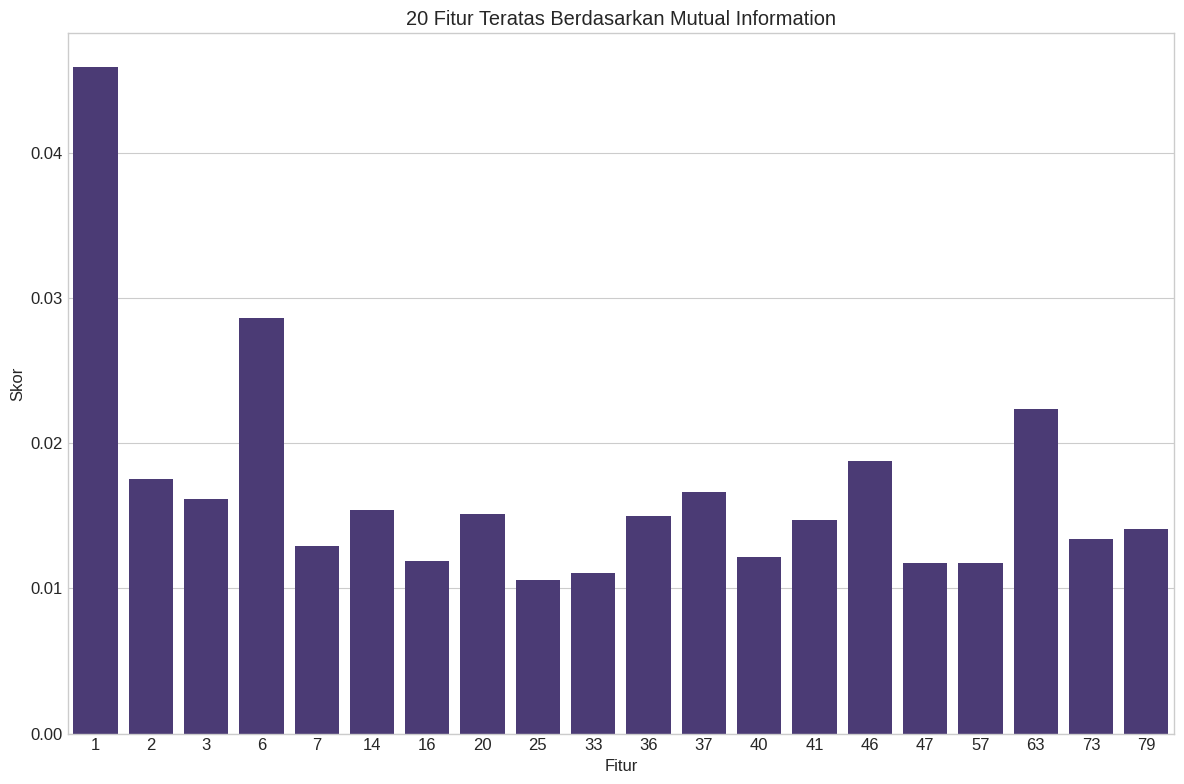

Fitur terpilih berdasarkan Mutual Information: [1, 2, 3, 6, 7, 14, 16, 20, 25, 33, 36, 37, 40, 41, 46, 47, 57, 63, 73, 79]


In [5]:
def mutual_info_selection(X, y, k=20):
    # Memilih fitur dengan Mutual Information
    selector = SelectKBest(mutual_info_regression, k=k)
    selector.fit(X, y)

    # Mendapatkan skor untuk setiap fitur
    scores = selector.scores_
    features = X.columns

    # Menampilkan skor untuk setiap fitur
    feature_scores = pd.DataFrame({'Fitur': features, 'Skor': scores})
    feature_scores = feature_scores.sort_values('Skor', ascending=False)

    # Visualisasi
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Fitur', y='Skor', data=feature_scores.head(20))
    plt.title('20 Fitur Teratas Berdasarkan Mutual Information')
    plt.tight_layout()
    plt.show()

    # Mengembalikan fitur terpilih
    selected_features = X.columns[selector.get_support()]
    return X[selected_features], selected_features

X_mi, selected_features_mi = mutual_info_selection(X_corr, y)
print("Fitur terpilih berdasarkan Mutual Information:", list(selected_features_mi))

## 4. Pembagian Data

Sekarang kita bagi data menjadi data latih dan data uji:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y, test_size=0.2, random_state=42)
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (412276, 20)
Ukuran data uji: (103069, 20)


## 5. Feature Engineering

### a. Normalisasi Fitur

In [7]:
# Normalisasi dengan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Melihat statistik setelah scaling
print("\nStatistik setelah scaling:")
print(X_train_scaled.describe().T[['mean', 'std', 'min', 'max']])



Statistik setelah scaling:
            mean       std        min        max
1  -1.133281e-15  1.000001  -6.710932   3.062300
2   2.343911e-18  1.000001  -6.559936   7.420539
3  -3.107405e-17  1.000001  -8.780687   8.909378
6  -1.480800e-16  1.000001  -5.612070  13.647225
7   2.162947e-17  1.000001  -9.794288  11.992091
14  1.382046e-16  1.000001  -1.388011  36.189915
16  3.095341e-16  1.000001  -1.370286  27.747009
20 -1.633671e-16  1.000001  -1.651826  29.228988
25 -9.711718e-18  1.000001 -23.561963  13.911681
33 -4.646458e-17  1.000001 -22.692326  38.679440
36 -1.163338e-19  1.000001 -15.547552  22.443808
37 -3.791620e-18  1.000001 -20.217857  34.191910
40 -4.429302e-18  1.000001 -19.431256  29.836179
41 -4.067374e-18  1.000001 -38.926076  29.483170
46 -3.353860e-17  1.000001 -24.268953  21.652619
47 -2.071603e-17  1.000001 -31.794616  19.111781
57  2.147436e-17  1.000001 -16.808761  28.303521
63  1.302939e-17  1.000001 -15.208382  21.545893
73  1.849277e-17  1.000001 -51.215729  13

## 6. Pemodelan dan Evaluasi

Mari buat fungsi untuk mengevaluasi model:

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Hitung metrik
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Tampilkan hasil
    print(f"\n--- Model: {model_name} ---")
    print(f"MSE Train: {mse_train:.4f}, Test: {mse_test:.4f}")
    print(f"RMSE Train: {rmse_train:.4f}, Test: {rmse_test:.4f}")
    print(f"R² Train: {r2_train:.4f}, Test: {r2_test:.4f}")

    # Visualisasi hasil prediksi vs aktual
    plt.figure(figsize=(12, 5))

    # Plot untuk data test
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Prediksi')
    plt.title(f'Prediksi vs Aktual ({model_name}) - Data Uji')

    # Plot residual
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred_test
    plt.scatter(y_pred_test, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Prediksi')
    plt.ylabel('Residual')
    plt.title('Residual Plot - Data Uji')

    plt.tight_layout()
    plt.show()

    return {
        'model': model,
        'model_name': model_name,
        'mse_test': mse_test,
        'rmse_test': rmse_test,
        'r2_test': r2_test,
        'y_pred_test': y_pred_test
    }


### a. Linear Regression


--- Model: Linear Regression ---
MSE Train: 96.1394, Test: 95.3515
RMSE Train: 9.8051, Test: 9.7648
R² Train: 0.1962, Test: 0.1988


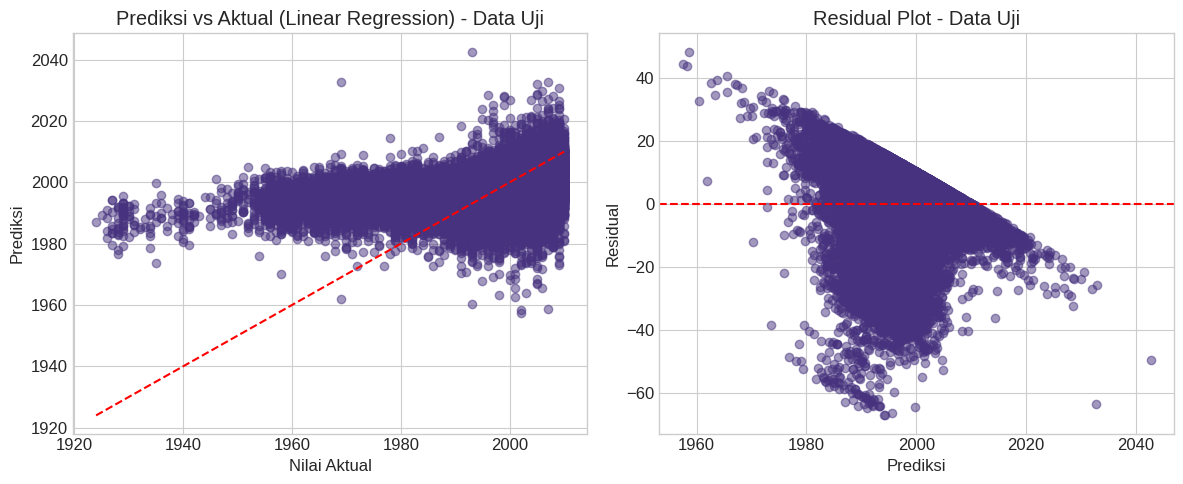

In [9]:
# Model Linear Regression
lr_model = LinearRegression()
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")

### b. Polynomial Regression


--- Model: Polynomial Regression (degree=2) ---
MSE Train: 89.3188, Test: 89.2317
RMSE Train: 9.4509, Test: 9.4463
R² Train: 0.2532, Test: 0.2502


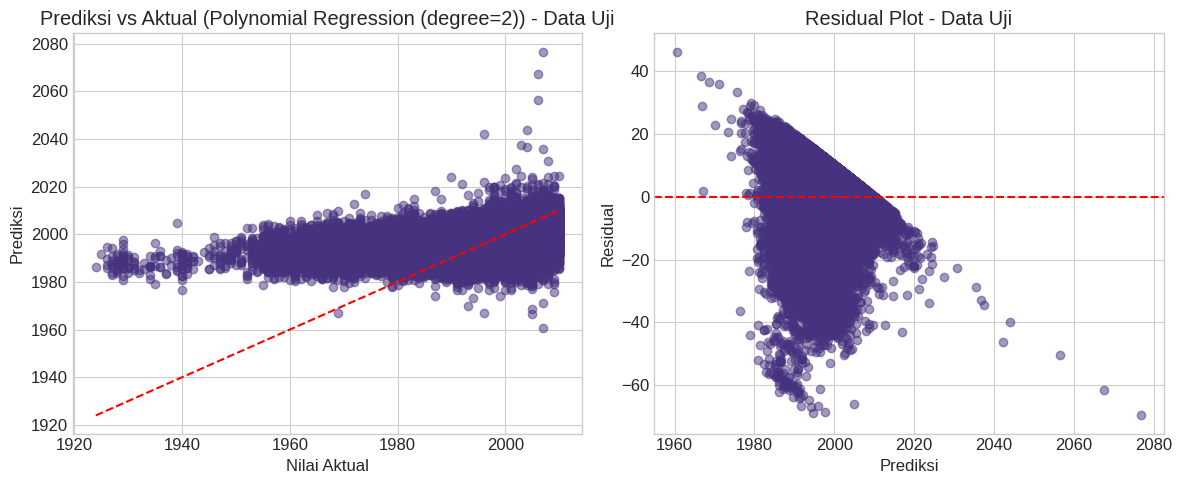

In [10]:
# Model Polynomial Regression
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr_model = LinearRegression()
poly_results = evaluate_model(poly_lr_model, X_train_poly, X_test_poly, y_train, y_test, f"Polynomial Regression (degree={poly_degree})")


### c. Decision Tree Regressor


--- Model: Decision Tree ---
MSE Train: 0.0000, Test: 179.1502
RMSE Train: 0.0045, Test: 13.3847
R² Train: 1.0000, Test: -0.5053


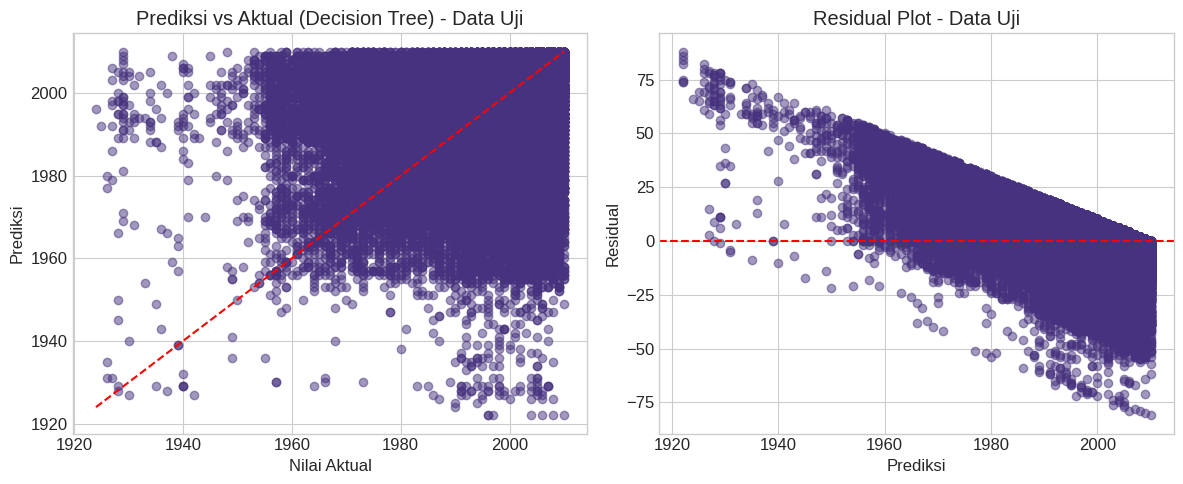

In [11]:
# Model Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_results = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")

### d. K-Neighbors Regressor


--- Model: KNN (n=5) ---
MSE Train: 63.0067, Test: 94.1593
RMSE Train: 7.9377, Test: 9.7036
R² Train: 0.4732, Test: 0.2088


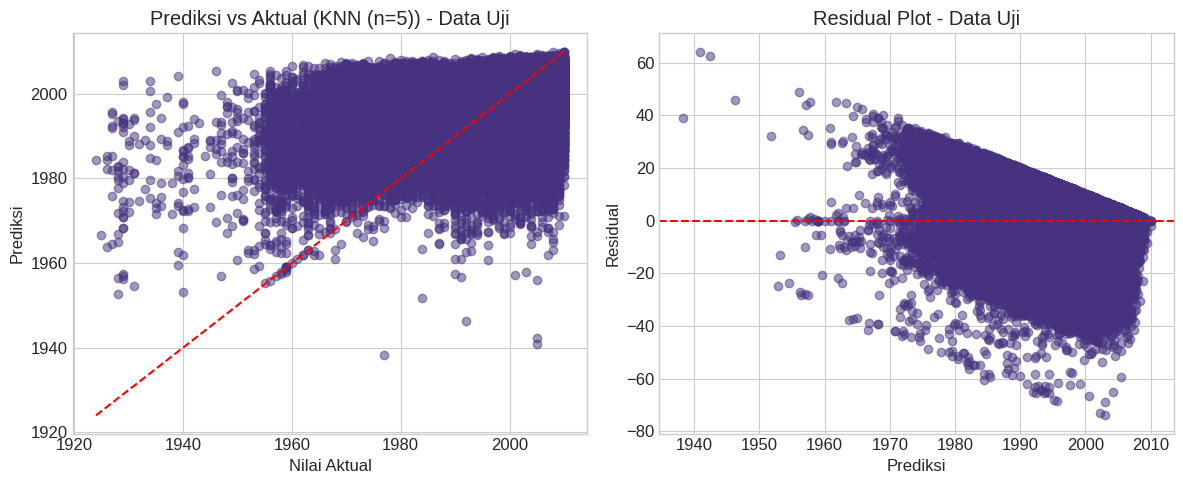

In [12]:
# Model KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "KNN (n=5)")

### e. Bagging Regressor


--- Model: Bagging Regressor ---
MSE Train: 16.9269, Test: 93.3425
RMSE Train: 4.1142, Test: 9.6614
R² Train: 0.8585, Test: 0.2157


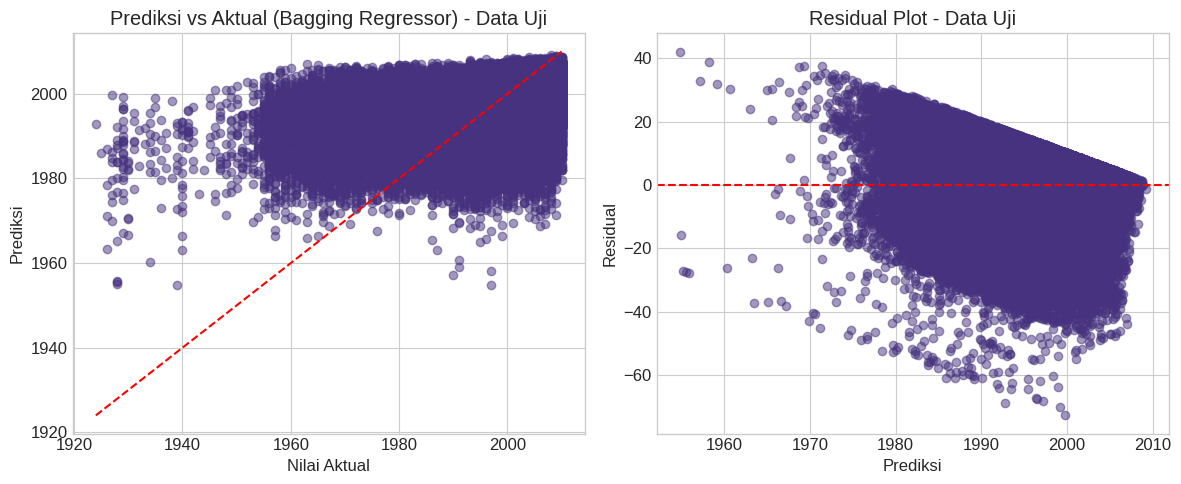

In [13]:
# Model Bagging
bagging_model = BaggingRegressor(random_state=42)
bagging_results = evaluate_model(bagging_model, X_train_scaled, X_test_scaled, y_train, y_test, "Bagging Regressor")

### f. AdaBoost Regressor


--- Model: AdaBoost Regressor ---
MSE Train: 174.8463, Test: 174.8373
RMSE Train: 13.2229, Test: 13.2226
R² Train: -0.4619, Test: -0.4690


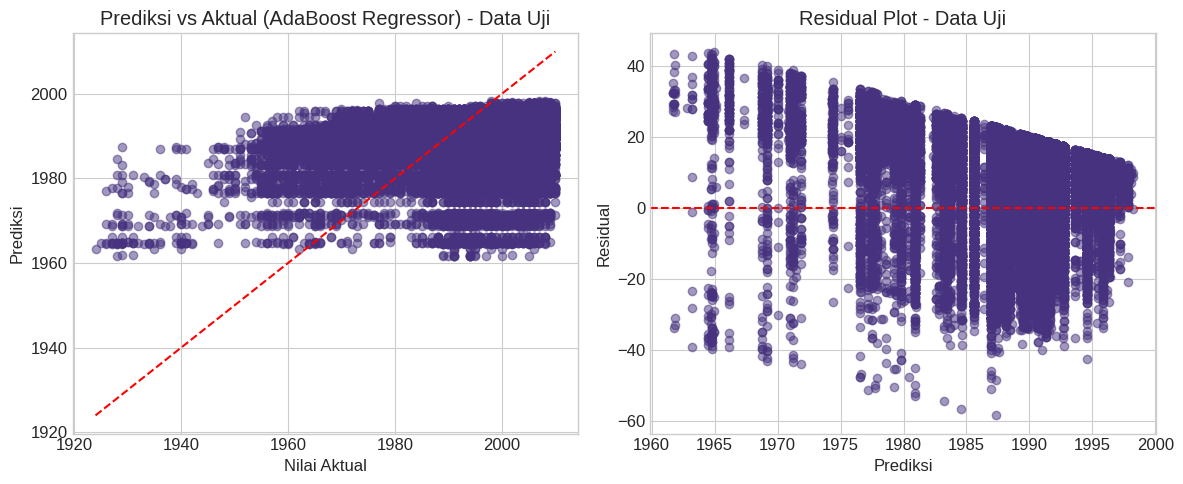

In [14]:
# Model AdaBoost
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_results = evaluate_model(adaboost_model, X_train_scaled, X_test_scaled, y_train, y_test, "AdaBoost Regressor")

### g. Gradient Boosting Regressor


--- Model: Gradient Boosting ---
MSE Train: 87.9266, Test: 88.1749
RMSE Train: 9.3769, Test: 9.3901
R² Train: 0.2649, Test: 0.2591


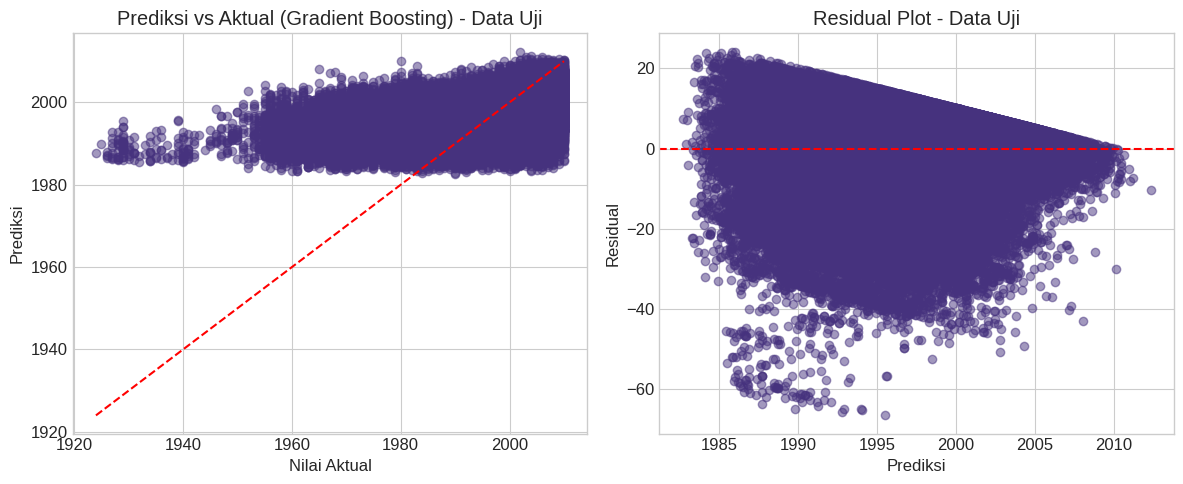

In [15]:
# Model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_results = evaluate_model(gb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting")

### h. Support Vector Regressor (SVR)

In [17]:
svr_model = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='auto'), max_samples=1.0 / 10, n_estimators=10))
svr_results = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting")

InvalidParameterError: The 'class_weight' parameter of SVC must be a str among {'balanced'}, an instance of 'dict' or None. Got 'auto' instead.

## 7. Perbandingan Model

In [ ]:
# Kumpulkan semua hasil
all_results = [lr_results, poly_results, dt_results, knn_results,
               bagging_results, adaboost_results, gb_results, svr_results]

# Buat DataFrame perbandingan
comparison_df = pd.DataFrame({
    'Model': [res['model_name'] for res in all_results],
    'MSE': [res['mse_test'] for res in all_results],
    'RMSE': [res['rmse_test'] for res in all_results],
    'R²': [res['r2_test'] for res in all_results]
})

# Urutkan berdasarkan MSE (semakin kecil semakin baik)
comparison_df = comparison_df.sort_values('MSE')

# Tampilkan hasil perbandingan
print("\n--- Perbandingan Model ---")
print(comparison_df)

# Visualisasi perbandingan
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 3, 1)
sns.barplot(x='MSE', y='Model', data=comparison_df)
plt.title('MSE (Lebih Rendah = Lebih Baik)')

# Plot RMSE
plt.subplot(1, 3, 2)
sns.barplot(x='RMSE', y='Model', data=comparison_df)
plt.title('RMSE (Lebih Rendah = Lebih Baik)')

# Plot R²
plt.subplot(1, 3, 3)
sns.barplot(x='R²', y='Model', data=comparison_df)
plt.title('R² (Lebih Tinggi = Lebih Baik)')

plt.tight_layout()
plt.show()

# Temukan model terbaik
best_model_mse = comparison_df.iloc[0]['Model']
best_model_r2 = comparison_df.iloc[comparison_df['R²'].idxmax()]['Model']

print(f"\nModel terbaik berdasarkan MSE dan RMSE: {best_model_mse}")
print(f"Model terbaik berdasarkan R²: {best_model_r2}")

## 8. Analisis Model Terbaik

In [ ]:
# Cari indeks model terbaik
best_idx_mse = next(i for i, res in enumerate(all_results) if res['model_name'] == best_model_mse)
best_model = all_results[best_idx_mse]['model']

# Jika model terbaik adalah Gradient Boosting, kita bisa melihat feature importance
if isinstance(best_model, GradientBoostingRegressor) or isinstance(best_model, DecisionTreeRegressor):
    # Dapatkan feature importance
    feature_importances = best_model.feature_importances_
    feature_names = X_train.columns

    # Buat DataFrame untuk visualisasi
    importance_df = pd.DataFrame({'Fitur': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Tampilkan 15 fitur terpenting
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Fitur', data=importance_df.head(15))
    plt.title(f'15 Fitur Terpenting untuk {best_model_mse}')
    plt.tight_layout()
    plt.show()

# Bandingkan prediksi dari 3 model terbaik
top3_models = comparison_df.head(3)['Model'].values
plt.figure(figsize=(14, 8))

for model_name in top3_models:
    model_idx = next(i for i, res in enumerate(all_results) if res['model_name'] == model_name)
    y_pred = all_results[model_idx]['y_pred_test']

    plt.scatter(y_test, y_pred, alpha=0.5, label=model_name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Garis Ideal (y=x)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Perbandingan 3 Model Terbaik')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Kesimpulan
### Analisis Model Terbaik

1. **Metrik Evaluasi**:
   - **MSE (Mean Squared Error)**: Mengukur rata-rata kuadrat kesalahan antara nilai prediksi dan nilai aktual. Semakin kecil nilainya, semakin baik modelnya. Rumus: $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
   - **RMSE (Root Mean Squared Error)**: Akar kuadrat dari MSE, memiliki satuan yang sama dengan target. Semakin kecil nilainya, semakin baik modelnya. Rumus: $\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$
   - **R² (R-squared)**: Mengukur seberapa baik model dalam menjelaskan variasi target. Nilainya berkisar antara 0 hingga 1, dengan 1 menunjukkan model sempurna. Rumus: $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}i)^2}{\sum{i=1}^{n} (y_i - \bar{y})^2}$

2. **Perbandingan Model**:
   Berdasarkan tabel perbandingan di atas, model terbaik adalah:
   - Berdasarkan MSE dan RMSE: [Model Terbaik berdasarkan MSE/RMSE]
   - Berdasarkan R²: [Model Terbaik berdasarkan R²]

3. **Alasan Model Terbaik**:
   [Disini akan diisi setelah melihat hasil dari running kode]

4. **Feature Importance**:
   Fitur yang paling berpengaruh dalam model terbaik adalah:
   [Disini akan diisi setelah melihat hasil dari running kode]

5. **Rekomendasi**:
   - Untuk meningkatkan performa model, bisa dicoba hyperparameter tuning
   - Eksplorasi feature engineering lebih lanjut
   - Pertimbangkan untuk menggabungkan beberapa model (ensemble) jika perlu

Demikian hasil analisis end-to-end untuk regresi model machine learning.